In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataPath = 'data\GeneralSurveyNumeric2023.csv'
data_raw = pd.read_csv(dataPath)

In [3]:
data_raw.shape

(152, 35)

In [4]:
completion = data_raw['Finished']
useful_data = data_raw.iloc[:, 17:]
useful_data_all = useful_data.merge(completion, left_index=True, right_index=True).iloc[2:, :]
# filtering out unfinished response --> dataframe with only 56 complete responses
useful_data_finished = useful_data_all[useful_data_all['Finished'] == "1"]

In [5]:
useful_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 2 to 151
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Q1        145 non-null    object
 1   Q2        145 non-null    object
 2   Q3_1      131 non-null    object
 3   Q3_2      131 non-null    object
 4   Q3_3      131 non-null    object
 5   Q3_4      131 non-null    object
 6   Q3_5      131 non-null    object
 7   Q3_6      131 non-null    object
 8   Q3_7      131 non-null    object
 9   Q4        127 non-null    object
 10  Q5        37 non-null     object
 11  Q6        32 non-null     object
 12  Q7_1      125 non-null    object
 13  Q7_2      125 non-null    object
 14  Q7_3      125 non-null    object
 15  Q7_4      124 non-null    object
 16  Q7_5      125 non-null    object
 17  Q7_6      125 non-null    object
 18  Finished  150 non-null    object
dtypes: object(19)
memory usage: 22.4+ KB


In [6]:
confidence = useful_data_all['Q3_1']
usage = useful_data_all['Q4']
new_df = pd.concat([confidence, usage], axis=1)
new_df = new_df.dropna()
new_df = new_df.astype(int)

In [7]:
new_df.head()

,Q3_1,Q4
3,4,4
4,5,4
5,2,4
6,5,5
7,4,3


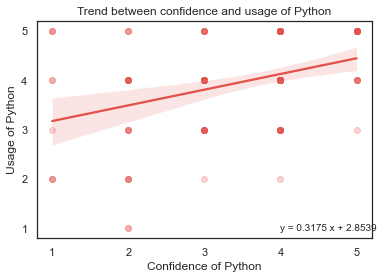

In [8]:
sns.set_theme(style="white", 
              palette="Spectral",
              rc={'figure.figsize':(8,6)})

g_corr = sns.regplot(data=new_df
                ,x='Q3_1'
                ,y='Q4'
                ,fit_reg = True
                ,scatter_kws = {'alpha' : 1/4}
                )

g_corr.set(xlabel="Confidence of Python"
               ,ylabel="Usage of Python"
               ,yticks=[1,2,3,4,5]
               ,xticks=[1,2,3,4,5]
               ,title="Trend between confidence and usage of Python")
plt.text(4, 1, 'y = 0.3175 x + 2.8539', ha='left', va='center')
plt.show()

In [9]:
g_corr.get_lines()[0].get_xdata()

array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.21212121, 2.25252525, 2.29292929, 2.33333333, 2.37373737,
       2.41414141, 2.45454545, 2.49494949, 2.53535354, 2.57575758,
       2.61616162, 2.65656566, 2.6969697 , 2.73737374, 2.77777778,
       2.81818182, 2.85858586, 2.8989899 , 2.93939394, 2.97979798,
       3.02020202, 3.06060606, 3.1010101 , 3.14141414, 3.18181818,
       3.22222222, 3.26262626, 3.3030303 , 3.34343434, 3.38383838,
       3.42424242, 3.46464646, 3.50505051, 3.54545455, 3.58585859,
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989

In [10]:
g_corr.get_lines()[0].get_ydata()

array([3.17152434, 3.18435447, 3.19718461, 3.21001475, 3.22284489,
       3.23567502, 3.24850516, 3.2613353 , 3.27416544, 3.28699558,
       3.29982571, 3.31265585, 3.32548599, 3.33831613, 3.35114626,
       3.3639764 , 3.37680654, 3.38963668, 3.40246681, 3.41529695,
       3.42812709, 3.44095723, 3.45378736, 3.4666175 , 3.47944764,
       3.49227778, 3.50510791, 3.51793805, 3.53076819, 3.54359833,
       3.55642846, 3.5692586 , 3.58208874, 3.59491888, 3.60774901,
       3.62057915, 3.63340929, 3.64623943, 3.65906956, 3.6718997 ,
       3.68472984, 3.69755998, 3.71039012, 3.72322025, 3.73605039,
       3.74888053, 3.76171067, 3.7745408 , 3.78737094, 3.80020108,
       3.81303122, 3.82586135, 3.83869149, 3.85152163, 3.86435177,
       3.8771819 , 3.89001204, 3.90284218, 3.91567232, 3.92850245,
       3.94133259, 3.95416273, 3.96699287, 3.979823  , 3.99265314,
       4.00548328, 4.01831342, 4.03114355, 4.04397369, 4.05680383,
       4.06963397, 4.0824641 , 4.09529424, 4.10812438, 4.12095

In [11]:
import scipy 

In [12]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g_corr.get_lines()[0].get_xdata(),y=g_corr.get_lines()[0].get_ydata())

In [13]:
slope

0.31754590498396873

In [14]:
intercept

2.8539784319440393

In [22]:
application_df = pd.DataFrame()
application_df['The course helps me appreciate\nwhere programming can\nbe applied in chemistry'] = useful_data_all['Q3_3']
application_df['I would enjoy learning\nmore about applications\nof Python in chemistry'] = useful_data_all['Q7_2']
application_df = application_df.dropna()
application_df = application_df.astype(int)

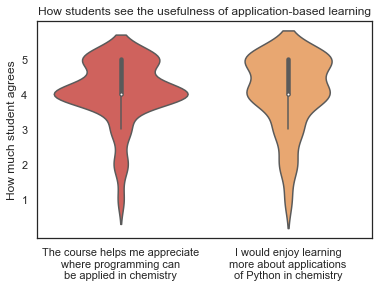

In [25]:
g_app = sns.violinplot(data=application_df)
g_app.set(yticks=[1,2,3,4,5]
         ,ylabel='How much student agrees'
         ,title='How students see the usefulness of application-based learning'
)

plt.show()